**Развлекательное приложение Procrastinate Pro+**

Несмотря на огромные вложения в рекламу развлекательного приложения Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,

- выгрузка их покупок за этот период,

- рекламные расходы.

Предстоит изучить:

- откуда приходят пользователи и какими устройствами они пользуются,

- сколько стоит привлечение пользователей из различных рекламных каналов;

- сколько денег приносит каждый клиент,

- когда расходы на привлечение клиента окупаются,

- какие факторы мешают привлечению клиентов.


### Загрузка данных и подготовка к анализу

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

In [39]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
import time
from datetime import datetime
from datetime import date, timedelta as td
import warnings

In [40]:
# Отключаем предупреждения
warnings.filterwarnings('ignore')

In [41]:
# Подгружаем файлы с данными
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

In [42]:
# Избавляемся от экспонентных записей в таблицах
pd.options.display.float_format = '{:20,.2f}'.format

Далее смотрим на исходные датафреймы и проводим предобработку данных.

In [43]:
# Создаем функцию для получения первичной информации

def first_look (data):
    print('Первые 5 строк: ')
    display(data.head(5))
    print('Последние 5 строк: ')
    display(data.tail(5))
    print('Типы данных: \n')
    display(data.info())
    print('Статистическая сводка: ')
    display(data.describe())
    print('Пропуски:\n')
    display(data.isna().sum())
    print('\n Процент пропусков от всего датасета: ')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\n Дубликаты \n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов нет')

#### Первичная информация о визитах (visits)

In [44]:
first_look(visits)

Первые 5 строк: 


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

Последние 5 строк: 


User Id   Region Device         Channel        Session Start  \
309896  329994900775       UK     PC         LeapBob  2019-10-31 13:28:12   
309897  334903592310   France     PC  lambdaMediaAds  2019-10-31 22:14:52   
309898  540102010126  Germany     PC         organic  2019-10-31 01:40:48   
309899  308736936846  Germany    Mac         organic  2019-10-31 07:37:34   
309900  109329042535  Germany     PC  lambdaMediaAds  2019-10-31 14:17:43   

                Session End  
309896  2019-10-31 14:39:29  
309897  2019-10-31 22:39:36  
309898  2019-10-31 01:41:31  
309899  2019-10-31 07:37:55  
309900  2019-10-31 15:17:04

Типы данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Статистическая сводка: 


User Id
count           309,901.00
mean    499,766,449,382.70
std     288,789,916,887.83
min             599,326.00
25%     249,369,122,776.00
50%     498,990,589,687.00
75%     749,521,111,616.00
max     999,999,563,947.00

Пропуски:



User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


 Процент пропусков от всего датасета: 


User Id                         0.00
Region                          0.00
Device                          0.00
Channel                         0.00
Session Start                   0.00
Session End                     0.00
dtype: float64


 Дубликаты 

Дубликатов нет


Из первичной информации можно сделать вывод об отсутствии пропусков и дубликатов.

Из того что нужно поправить: названия столбцов (сделаем "змеиный регистр") и тип данных в столбцах с датами.

In [45]:
# Приведем названия столбцов к snake_case
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [46]:
# Устанавливает формат datetime в столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

#### Первичная информация о заказах (orders)

In [47]:
first_look(orders)

Первые 5 строк: 


User Id             Event Dt              Revenue
0  188246423999  2019-05-01 23:09:52                 4.99
1  174361394180  2019-05-01 12:24:04                 4.99
2  529610067795  2019-05-01 11:34:04                 4.99
3  319939546352  2019-05-01 15:34:40                 4.99
4  366000285810  2019-05-01 13:59:51                 4.99

Последние 5 строк: 


User Id             Event Dt              Revenue
40207  651604369137  2019-10-31 16:19:07                 4.99
40208  275341387049  2019-10-31 01:17:17                 4.99
40209  374656616484  2019-10-31 06:17:29                 4.99
40210  168548862926  2019-10-31 22:46:19                 4.99
40211  329994900775  2019-10-31 13:29:06                 4.99

Типы данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Статистическая сводка: 


User Id              Revenue
count            40,212.00            40,212.00
mean    499,029,531,203.23                 5.37
std     286,093,675,967.17                 3.45
min             599,326.00                 4.99
25%     251,132,440,436.75                 4.99
50%     498,283,972,665.00                 4.99
75%     743,332,711,780.00                 4.99
max     999,895,427,370.00                49.99

Пропуски:



User Id     0
Event Dt    0
Revenue     0
dtype: int64


 Процент пропусков от всего датасета: 


User Id                    0.00
Event Dt                   0.00
Revenue                    0.00
dtype: float64


 Дубликаты 

Дубликатов нет


Аналогично предыдущему датафрейму можно сделать вывод об отсутствии пропусков и дубликатов.

Из того что нужно поправить: названия столбцов (сделаем "змеиный регистр") и тип данных в столбце с датами.

In [48]:
# Приведем названия столбцов к snake_case
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [49]:
# Устанавливает формат datetime в столбцах с датами
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### Первичная информация о расходах (costs)

In [50]:
first_look(costs)

Первые 5 строк: 


dt   Channel                costs
0  2019-05-01  FaceBoom               113.30
1  2019-05-02  FaceBoom                78.10
2  2019-05-03  FaceBoom                85.80
3  2019-05-04  FaceBoom               136.40
4  2019-05-05  FaceBoom               122.10

Последние 5 строк: 


dt         Channel                costs
1795  2019-10-23  lambdaMediaAds                 4.00
1796  2019-10-24  lambdaMediaAds                 6.40
1797  2019-10-25  lambdaMediaAds                 8.80
1798  2019-10-26  lambdaMediaAds                 8.80
1799  2019-10-27  lambdaMediaAds                12.00

Типы данных: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Статистическая сводка: 


costs
count             1,800.00
mean                 58.61
std                 107.74
min                   0.80
25%                   6.50
50%                  12.29
75%                  33.60
max                 630.00

Пропуски:



dt         0
Channel    0
costs      0
dtype: int64


 Процент пропусков от всего датасета: 


dt                        0.00
Channel                   0.00
costs                     0.00
dtype: float64


 Дубликаты 

Дубликатов нет


Аналогично предыдущим датафреймам можно сделать вывод об отсутствии пропусков и дубликатов.

Из того что нужно поправить: названия столбцов (сделаем "змеиный регистр") и тип данных в столбце с датами.

In [51]:
# Приведем названия столбцов к snake_case
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [52]:
# Устанавливает формат datetime в столбцах с датами
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Выводы по разделу**

Была проведена предобработка данных. Изменены названия столбцов ("змеиный регистр") и скорректированы типы данных в столбцах с датами.

### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [53]:
# Функция для создания пользовательских профилей
def get_profiles(sessions, orders, costs):

   # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [54]:
# Функция для расчета удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - pd.Timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [55]:
# Функция для расчета конверсии
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - pd.Timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [56]:
# Функция для расчета LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - pd.Timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [57]:
# Функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [58]:
# Функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [59]:
# Фунцкия для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [60]:
# Функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True,ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

#### Составление профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

Воспользуемся функцией get_profiles() для создания профилей пользователей.

In [61]:
profiles = get_profiles(visits, orders, costs)
profiles.sample(5)

user_id            first_ts             channel   device  \
84286  560522796760 2019-10-21 04:01:35             organic      Mac   
71659  475591451645 2019-06-04 20:51:35             LeapBob  Android   
99094  660358224666 2019-10-02 15:12:35             YRabbit   iPhone   
12104   80614177402 2019-08-21 21:44:10  OppleCreativeMedia       PC   
19562  130220879473 2019-05-09 05:06:14            FaceBoom   iPhone   

              region          dt               month  payer  \
84286  United States  2019-10-21 2019-10-21 04:01:35  False   
71659         France  2019-06-04 2019-06-04 20:51:35  False   
99094  United States  2019-10-02 2019-10-02 15:12:35  False   
12104         France  2019-08-21 2019-08-21 21:44:10  False   
19562  United States  2019-05-09 2019-05-09 05:06:14  False   

          acquisition_cost  
84286                 0.00  
71659                 0.21  
99094                 0.23  
12104                 0.25  
19562                 1.18

Определяем минимальную и максимальную даты привлечения пользователей.

In [62]:
min_date = costs['dt'].min()
max_date = costs['dt'].max()

print(f'Минимальная дата привлечения пользователей {min_date}, максимальная {max_date}')

Минимальная дата привлечения пользователей 2019-05-01, максимальная 2019-10-27


По результатам данного раздела получили профили пользователей с указанием канала привлечения, устройства, страны, информации о том является ли пользователь платящим, цены его привлечения и датами сессий.

Минимальная и максимальные даты привлечения пользователей совпадают с датами-границами нашего анализа (по ТЗ).

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Для анализа количества привлеченных пользователей по странам сделаем сводную таблицу.

In [63]:
# Делаем сводную таблицу
users_by_country = (profiles.pivot_table(index = 'region',
                                         values = 'payer',
                                         aggfunc = ['count','sum', 'mean'])
                            .rename(columns={'region': 'Страна',
                                             'count': 'Общее количество пользователей',
                                             'sum': 'Платящие пользователи',
                                             'mean': 'Доля платящих'})
                            .droplevel(1, axis=1)
                            .sort_values(by='Доля платящих', ascending=False)
                            .style.format({'Доля платящих':'{:.2%}'})
                   )
users_by_country


Из таблицы видим, что пользователи есть из четырех стран: США, Великобритания, Франция и Германия. Больше всего платящих пользователй в США, их доля 6,9 %.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Для того что бы узнать какими устройствами пользуются клиенты выведем уникалье значения из столбца **device**.

In [64]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

Приложение используют на 'Mac', 'iPhone', 'PC' и 'Android'.

Для анализа предпочтений платящих пользователей построим сводную таблицу.

In [65]:
# Делаем сводную таблицу
payers_devices = (profiles.pivot_table(index = 'device',
                                       values = 'payer',
                                       aggfunc = ['count','sum', 'mean'])
                          .rename(columns={'device': 'Устройство',
                                            'count': 'Общее количество пользователей',
                                            'sum': 'Платящие пользователи',
                                            'mean': 'Доля платящих'})
                          .droplevel(1, axis=1)
                          .sort_values(by='Доля платящих', ascending=False)
                          .style.format({'Доля платящих':'{:.2%}'})
                    )
payers_devices

Устройства с которых больше всего платящих пользователей ожидаемо Mac и iPhone.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Для определения рекламных источников в первую очередь нужно отсечь данные от пользователей которые пришли самостоятельно.

In [66]:
users_by_channel = profiles.query('channel != "organic"')
users_by_channel['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

Далее постороим сводную таблицу для анализа рекламных источников и определения каналов из которых пришло больше всего платящих пользователей.

In [67]:
# Делаем сводную таблицу
users_by_channel = (users_by_channel.pivot_table(index = 'channel',
                                                 values = 'payer',
                                                 aggfunc = ['count','sum', 'mean'])
                                    .rename(columns={'channel': 'Канал привлечения',
                                                     'count': 'Общее количество пользователей',
                                                     'sum': 'Платящие пользователи',
                                                     'mean': 'Доля платящих'})
                                    .droplevel(1, axis=1)
                                    .sort_values(by='Доля платящих', ascending=False)
                                    .style.format({'Доля платящих':'{:.2%}'})
                    )
users_by_channel

Из таблицы видим, что доля платящих клиентов с FaceBoom наибольшая и составляет 12,2 %, сразу стоит отметить, что наиболее затратный TipTop лишь на 4м месте по доле конвертированных клиентов.

Исходя из данных можно сделать ряд выводов по разделу:
    
- больше всего платящих пользователй в США, их доля 6,9 % (от общего числа пользователей США, а не от общего числа платящих пользователей);
    
- устройства с которых больше всего платящих пользователей ожидаемо Mac и iPhone;
    
- доля платящих клиентов с FaceBoom наибольшая и составляет 12,2 %, сразу стоит отметить, что наиболее затратный TipTop лишь на 4м месте по доле конвертированных клиентов.

### Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.

In [68]:
costs_sum = costs['costs'].sum()
print(f'Общая сумма, которую потратили на рекламу составила: {costs_sum:20,.2f} $')

Общая сумма, которую потратили на рекламу составила:           105,497.30 $


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [69]:
# Делаем сводную таблицу
market_by_channel = (costs.pivot_table(index = 'channel',
                                       aggfunc = {'costs' : 'sum'})
                          .sort_values(by='costs', ascending=False) # Сортируем по убыванию
                          .reset_index()
                    )
# Переименовываем столбцы
market_by_channel.columns = ['Канал привлечения', 'Затраты (в $)']
market_by_channel

Канал привлечения        Затраты (в $)
0              TipTop            54,751.30
1            FaceBoom            32,445.60
2      WahooNetBanner             5,151.00
3          AdNonSense             3,911.25
4  OppleCreativeMedia             2,151.25
5      RocketSuperAds             1,833.00
6             LeapBob             1,797.60
7      lambdaMediaAds             1,557.60
8        MediaTornado               954.48
9             YRabbit               944.22

В лидерах по расходам на рекламу TipTop и FaceBoom. Сразу можно отметить, что затраты на рекламу не всегда соотвествуют отдаче в лице платящих пользователей. В данном случае самый затратный источник (TipTop) не принес большинства платящих пользователей.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

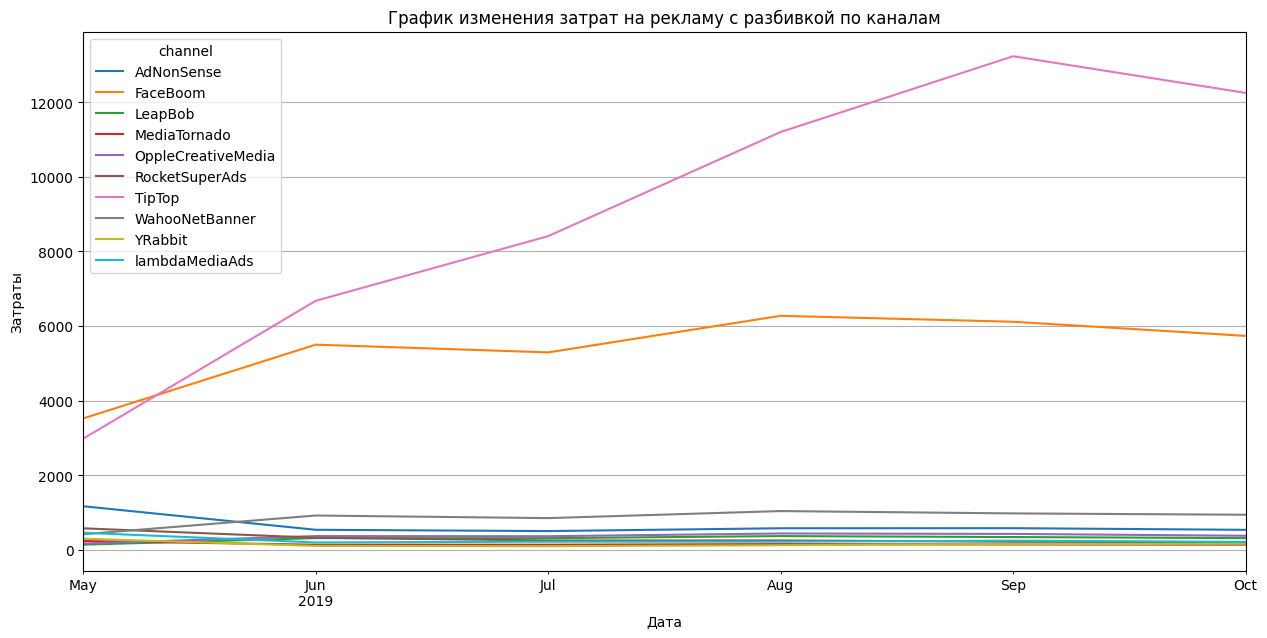

In [74]:
# Приводим даты к месяцам
costs['month'] = costs['dt'].astype('datetime64[M]')

# Строим сводную таблицу
costs_by_months = (costs.pivot_table(index = 'month',
                                     columns = 'channel',
                                     values = 'costs',
                                     aggfunc = 'sum')
                  )
# Строим график
costs_by_months.plot(figsize=(15, 7),
                     grid=True,
                     label='Каналы', # название линии
                     legend=True)

plt.title('График изменения затрат на рекламу с разбивкой по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

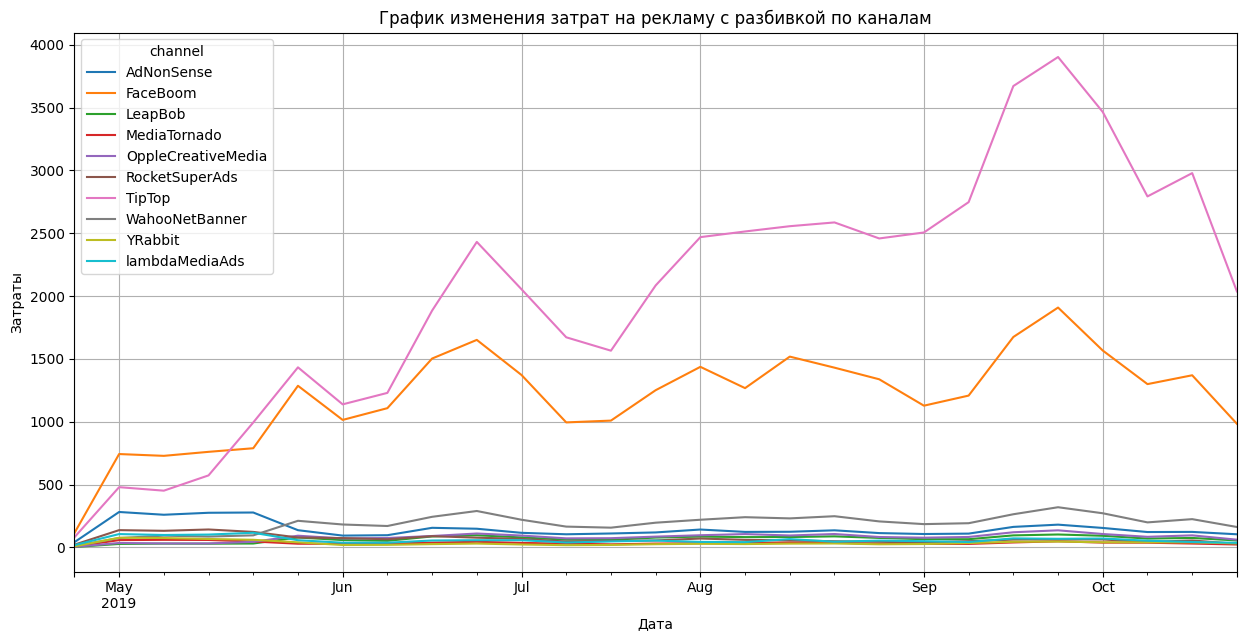

In [75]:
# Приводим даты к неделям
costs['week'] = costs['dt'].astype('datetime64[W]')

# Строим сводную таблицу
costs_by_week = (costs.pivot_table(index = 'week',
                                     columns = 'channel',
                                     values = 'costs',
                                     aggfunc = 'sum')
                  )
# Строим график
costs_by_week.plot(figsize=(15, 7),
                     grid=True,
                     label='Каналы', # название линии
                     legend=True)

plt.title('График изменения затрат на рекламу с разбивкой по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

In [76]:
display(costs)
display(costs_by_months)
display(costs_by_week)

dt         channel                costs      month       week
0     2019-05-01        FaceBoom               113.30 2019-05-01 2019-04-25
1     2019-05-02        FaceBoom                78.10 2019-05-01 2019-05-02
2     2019-05-03        FaceBoom                85.80 2019-05-01 2019-05-02
3     2019-05-04        FaceBoom               136.40 2019-05-01 2019-05-02
4     2019-05-05        FaceBoom               122.10 2019-05-01 2019-05-02
...          ...             ...                  ...        ...        ...
1795  2019-10-23  lambdaMediaAds                 4.00 2019-10-01 2019-10-17
1796  2019-10-24  lambdaMediaAds                 6.40 2019-10-01 2019-10-24
1797  2019-10-25  lambdaMediaAds                 8.80 2019-10-01 2019-10-24
1798  2019-10-26  lambdaMediaAds                 8.80 2019-10-01 2019-10-24
1799  2019-10-27  lambdaMediaAds                12.00 2019-10-01 2019-10-24

[1800 rows x 5 columns]

channel              AdNonSense             FaceBoom              LeapBob  \
month                                                                       
2019-05-01             1,169.70             3,524.40               140.28   
2019-06-01               538.65             5,501.10               314.58   
2019-07-01               504.00             5,294.30               313.53   
2019-08-01               579.60             6,274.40               369.81   
2019-09-01               581.70             6,114.90               343.98   
2019-10-01               537.60             5,736.50               315.42   

channel            MediaTornado   OppleCreativeMedia       RocketSuperAds  \
month                                                                       
2019-05-01               238.56               169.75               577.98   
2019-06-01               138.00               370.00               325.72   
2019-07-01               138.48               366.50               252.07   
2019-08-01               154.56               439.25               253.11   
2019-09-01               144.72               427.75               218.40   
2019-10-01               140.16               378.00               205.72   

channel                  TipTop       WahooNetBanner              YRabbit  \
month                                                                       
2019-05-01             2,981.00               418.80               299.70   
2019-06-01             6,675.60               921.00               106.20   
2019-07-01             8,410.20               851.40                97.38   
2019-08-01            11,202.00             1,040.40               124.74   
2019-09-01            13,232.50               977.40               152.79   
2019-10-01            12,250.00               942.00               163.41   

channel          lambdaMediaAds  
month                            
2019-05-01               458.40  
2019-06-01               199.20  
2019-07-01               219.20  
2019-08-01               220.00  
2019-09-01               247.20  
2019-10-01               213.60

channel              AdNonSense             FaceBoom              LeapBob  \
week                                                                        
2019-04-25                40.95               113.30                 2.52   
2019-05-02               281.40               742.50                27.09   
2019-05-09               259.35               728.20                29.61   
2019-05-16               275.10               760.10                28.98   
2019-05-23               277.20               788.70                30.45   
2019-05-30               136.50             1,285.90                78.54   
2019-06-06                93.45             1,014.20                57.96   
2019-06-13                96.60             1,107.70                52.08   
2019-06-20               155.40             1,502.60                86.73   
2019-06-27               148.05             1,651.10                96.18   
2019-07-04               115.50             1,371.70                78.96   
2019-07-11               103.95               994.40                61.32   
2019-07-18               110.25             1,008.70                60.27   
2019-07-25               118.65             1,250.70                77.70   
2019-08-01               141.75             1,436.60                85.47   
2019-08-08               122.85             1,267.20                81.48   
2019-08-15               123.90             1,518.00                81.90   
2019-08-22               135.45             1,430.00                87.36   
2019-08-29               113.40             1,337.60                74.97   
2019-09-05               106.05             1,127.50                64.89   
2019-09-12               109.20             1,207.80                64.68   
2019-09-19               162.75             1,674.20                95.13   
2019-09-26               180.60             1,908.50               102.27   
2019-10-03               154.35             1,566.40                91.98   
2019-10-10               121.80             1,299.10                69.72   
2019-10-17               122.85             1,369.50                74.76   
2019-10-24               103.95               983.40                54.60   

channel            MediaTornado   OppleCreativeMedia       RocketSuperAds  \
week                                                                        
2019-04-25                 6.24                 4.25                21.06   
2019-05-02                57.60                34.75               136.89   
2019-05-09                59.76                31.00               131.62   
2019-05-16                58.80                31.00               142.16   
2019-05-23                46.56                44.00               122.85   
2019-05-30                28.80                92.50                78.39   
2019-06-06                27.84                70.75                73.71   
2019-06-13                29.76                74.50                64.35   
2019-06-20                37.20                90.25                88.98   
2019-06-27                44.16               110.00                76.89   
2019-07-04                35.28                93.75                67.34   
2019-07-11                29.04                71.50                45.95   
2019-07-18                24.00                72.75                50.50   
2019-07-25                30.00                85.25                55.05   
2019-08-01                32.88                96.25                70.07   
2019-08-08                33.60               105.50                59.60   
2019-08-15                38.88                94.25                55.51   
2019-08-22                37.44               106.00                48.42   
2019-08-29                27.84                82.25                44.20   
2019-09-05                27.36                76.75                38.02   
2019-09-12                27.12                82.50                48.7

Из визуальной информации наглядно видно, что затраты на основные два источника рекламы растут из месяца в месяц. Заметен пик в конце сентября.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

Для того, что бы выяснить сколько стоило привлечение одного пользователя из каждого источника построим сводную таблицу.

In [77]:
# Строим сводную таблицу
cac = (profiles.pivot_table(index = 'channel',
                            aggfunc = {'acquisition_cost' : 'mean'})
               .sort_values(by='acquisition_cost', ascending=False)
               .reset_index()
      )
cac.columns = ['Канал привлечения', 'Средняя стоимость привлечения клиента']
cac

Канал привлечения  Средняя стоимость привлечения клента
0               TipTop                                  2.80
1             FaceBoom                                  1.11
2           AdNonSense                                  1.01
3       lambdaMediaAds                                  0.72
4       WahooNetBanner                                  0.60
5       RocketSuperAds                                  0.41
6   OppleCreativeMedia                                  0.25
7              YRabbit                                  0.22
8         MediaTornado                                  0.22
9              LeapBob                                  0.21
10             organic                                  0.00

In [78]:
av_acquisition_cost = round(profiles.query('payer == True')['acquisition_cost'].mean(),2)
print(f'Средняя стоимость привлечения платного клиента из всех источников составляет {av_acquisition_cost} $')

Средняя стоимость привлечения платного клиента из всех источников составляет 1.17 $


Как видим стоимость привлечения клиентов самая дорогая у TipTop, далее идут FaceBoom и AdNonSense. Средняя стоимость привлечения платного клиента из всех источников 1.17 $.

**Вывод по разделу**

- общая сумма, которую потратили на рекламу составила: 105,497.30 долл. США;

- больше всего трат приходитя на TipTop, далее идет FaceBoom;

- видим, что привличение клиентов со временем становится в дороже;

- самый дорогой трафик - TipTop (средняя стоимость - 2.80 долл. США за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 долл. США;
- cредняя стоимость привлечения платного клиента из всех источников 1.17 долл. США.

### Окупаемость рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Для дальнейшей аналитики понадобятся момент и горизонт анализа, определим их учитывая, что дата анализа 1 ноября 2019 г.

Также уберем из анализа пользователей, которые пришли сами.

In [79]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

profiles = profiles.query('channel != "organic"') # убираем органических пользователей

Считаем LTV и ROI и строим графики динамики LTV, CAC и ROI.

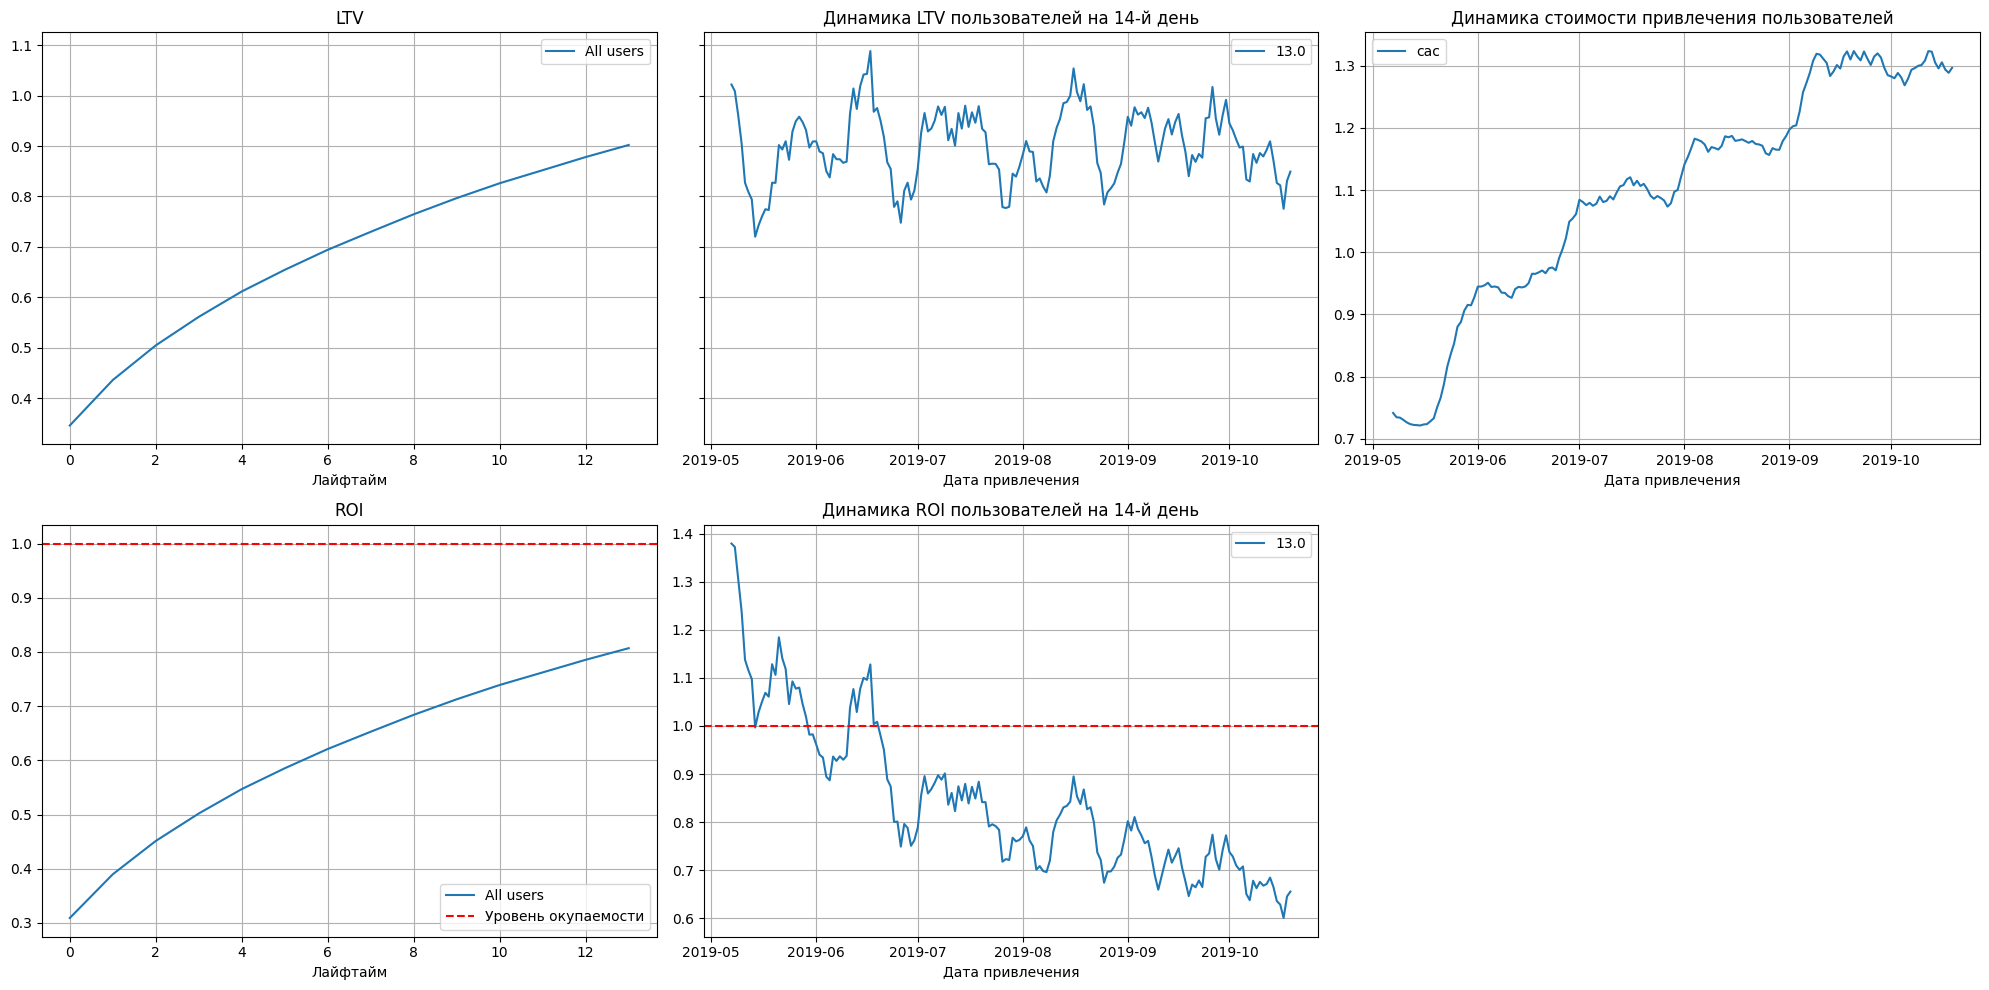

In [80]:
# Считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Исходя из визуальной информации можно сделать ряд выводов:

- инвестиции в рекламу не окупаются - ROI не превышает 1;
- начиная с июня месяца резко возрастает стоимость привлечения клиентов, примерно в этот же момент пропадает окупаемость, т.е. затраты на привлечение клиента начинают превышать LTV;
- LTV принимает приемлимое значение на протяжении вего двухнедельного периода, т.е. пользователи являются вполне платежеспособными.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания. Проанализируем окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


##### Устройства

Для дальнейшего анализа применяем заготовленные функции для расчета различных метрик.

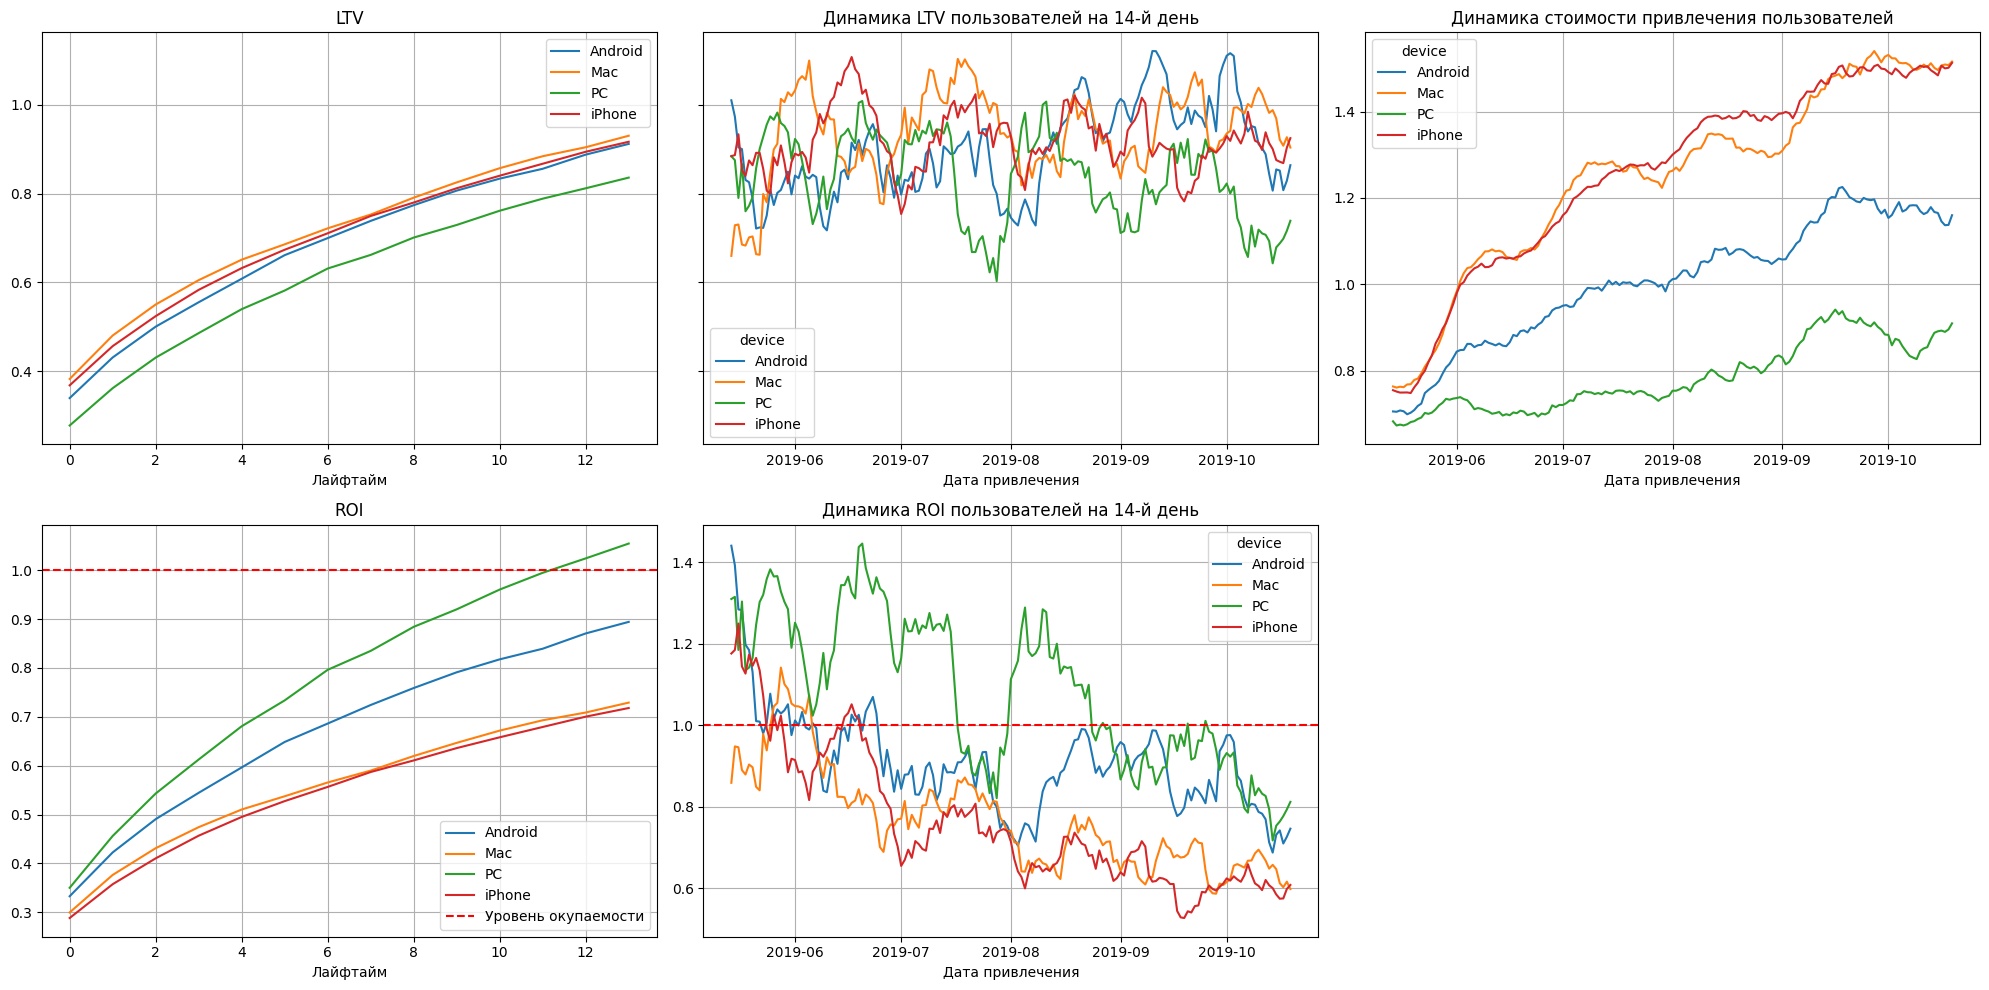

In [81]:
# Выбор параметра (устройство)
dimensions = ['device']

# Применяем функцию для расчета метрик
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = (get_ltv(profiles,
                                                                       orders,
                                                                       observation_date,
                                                                       horizon_days,
                                                                       dimensions=dimensions)
                                                              )
# Визуализируем информацию
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По устройствам можно сделать следующие выводы:

- в начале рассматриваемого периода окупаемость была по всем устройствам, в начале лета стали расти затраты на привлечение клиентов и окупаемость пропала;
- динамика LTV приемлемая, пользователи обеспечивают денеджный поток;
- динамика стоимости привлечения пользователей растет в каждом периоде;
- по окупаемости только пользователи РС оправдали свои затраты, хуже всего дела с владельцами Mac и Iphone;
- стоит обратить внимание на владельцев Mac и Iphone, т.к. их больше всего, а затраты на их привлечение растут из месяца в месяц из-за чего страдает ROI.

Посчитаем и визуализируем конверсию, вызвав заранее заготовленные функции get_conversion() и plot_conversion().

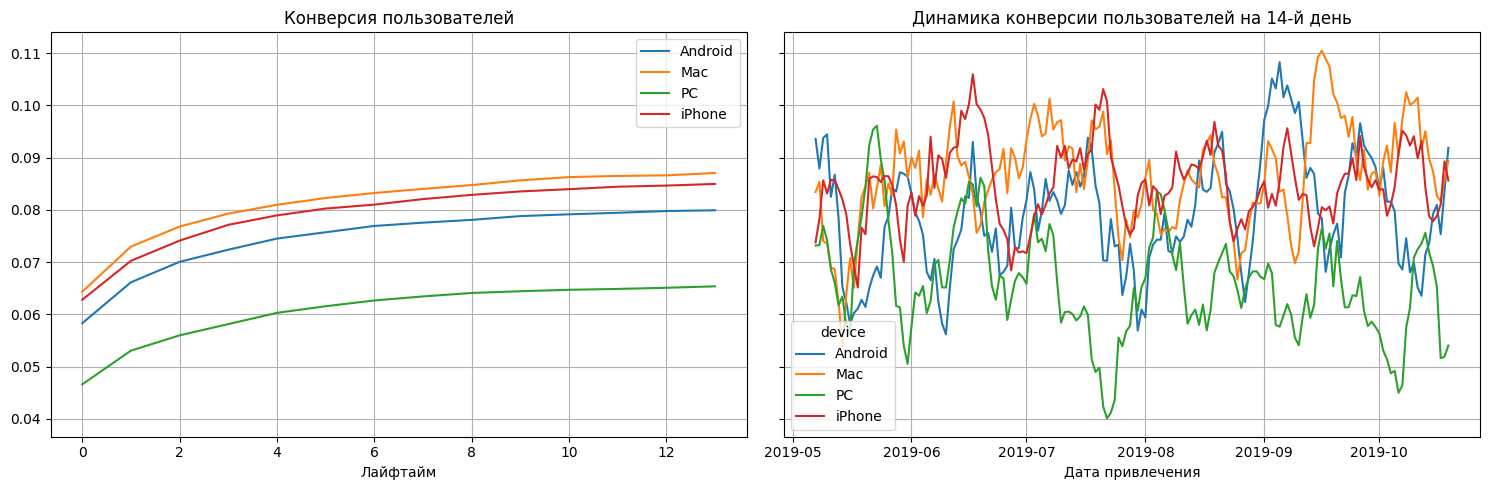

In [82]:
# Выбор параметра (устройство)
dimensions = ['device']

# Применяем функцию для расчета метрик
conversion_raw, conversion_grouped, conversion_history = (get_conversion(profiles,
                                                                         orders,
                                                                         observation_date,
                                                                         horizon_days,
                                                                         dimensions=dimensions)
                                                         )
# Визуализируем информацию
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Исходя из визуальной информации, можно сделать вывод, что пользователи Mac, Android и iPhone конвертируются в платящих пользователей лучше, чем пользователи РС. В целом динамика по данному показателю не кажется плохой.

Посчитаем и визуализируем удержание, вызвав заранее заготовленные функции get_retention() и plot_retention().

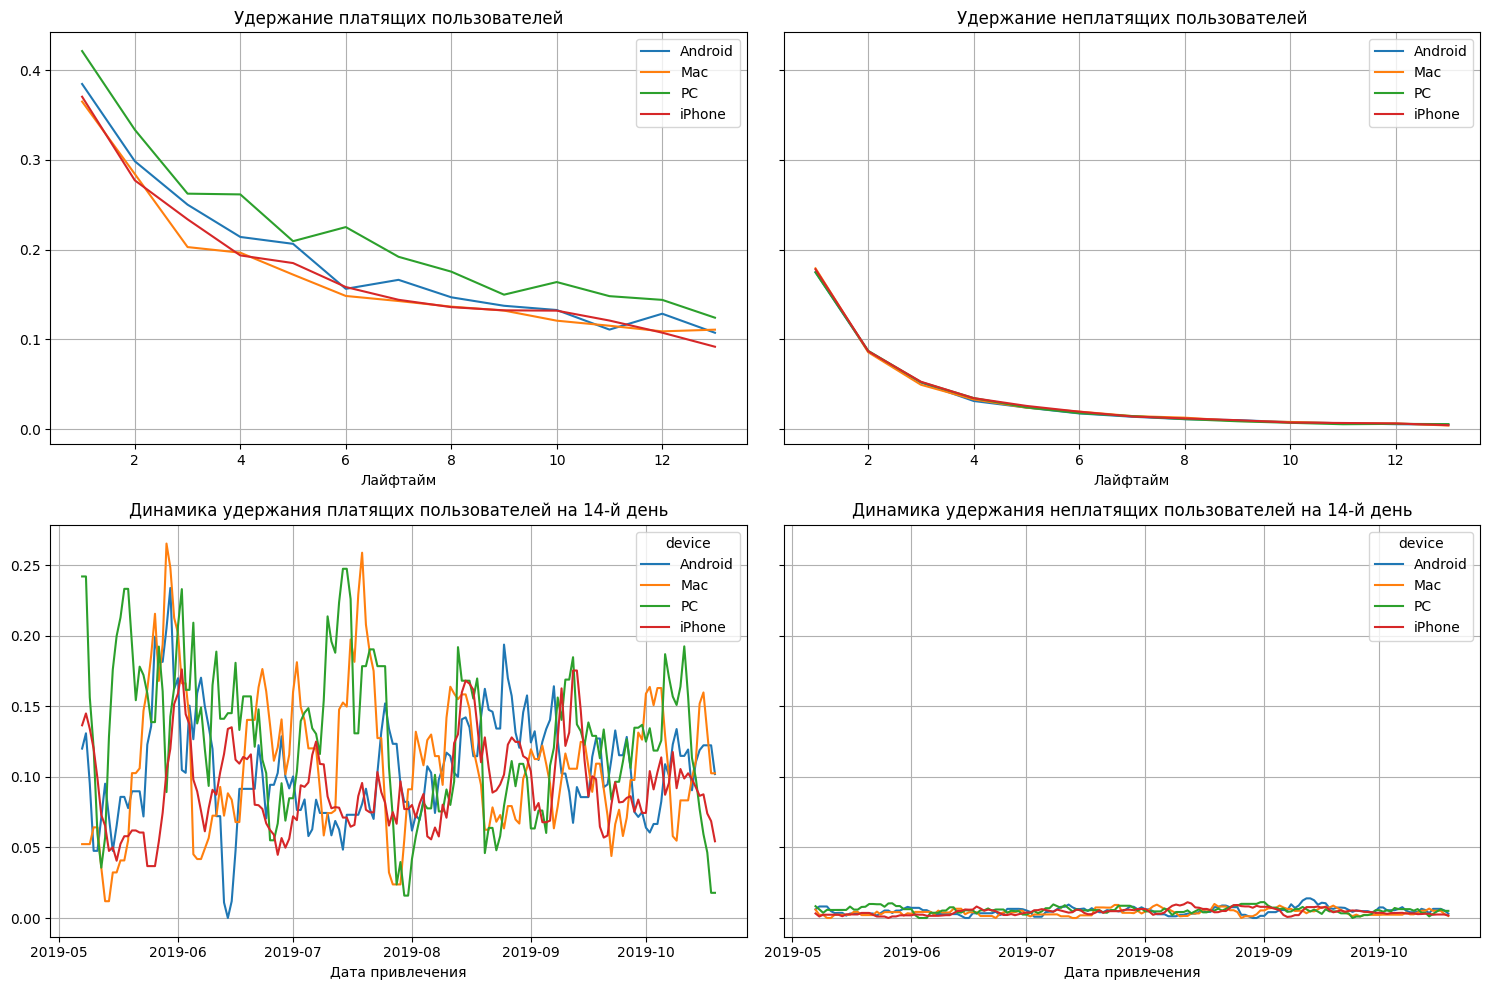

In [83]:
# Выбор параметра (устройство)
dimensions = ['device']

# Применяем функцию для расчета метрик
retention_raw, retention_grouped, retention_history = (get_retention(profiles,
                                                                     visits,
                                                                     observation_date,
                                                                     horizon_days,
                                                                     dimensions=dimensions)
                                                      )
# Визуализируем информацию
plot_retention(retention_grouped, retention_history, horizon_days)

По динамике удержания нет сильных различий в зависимости от устройств. Неплатящие пользователи удерживаются стабильно плохо.

##### Страны

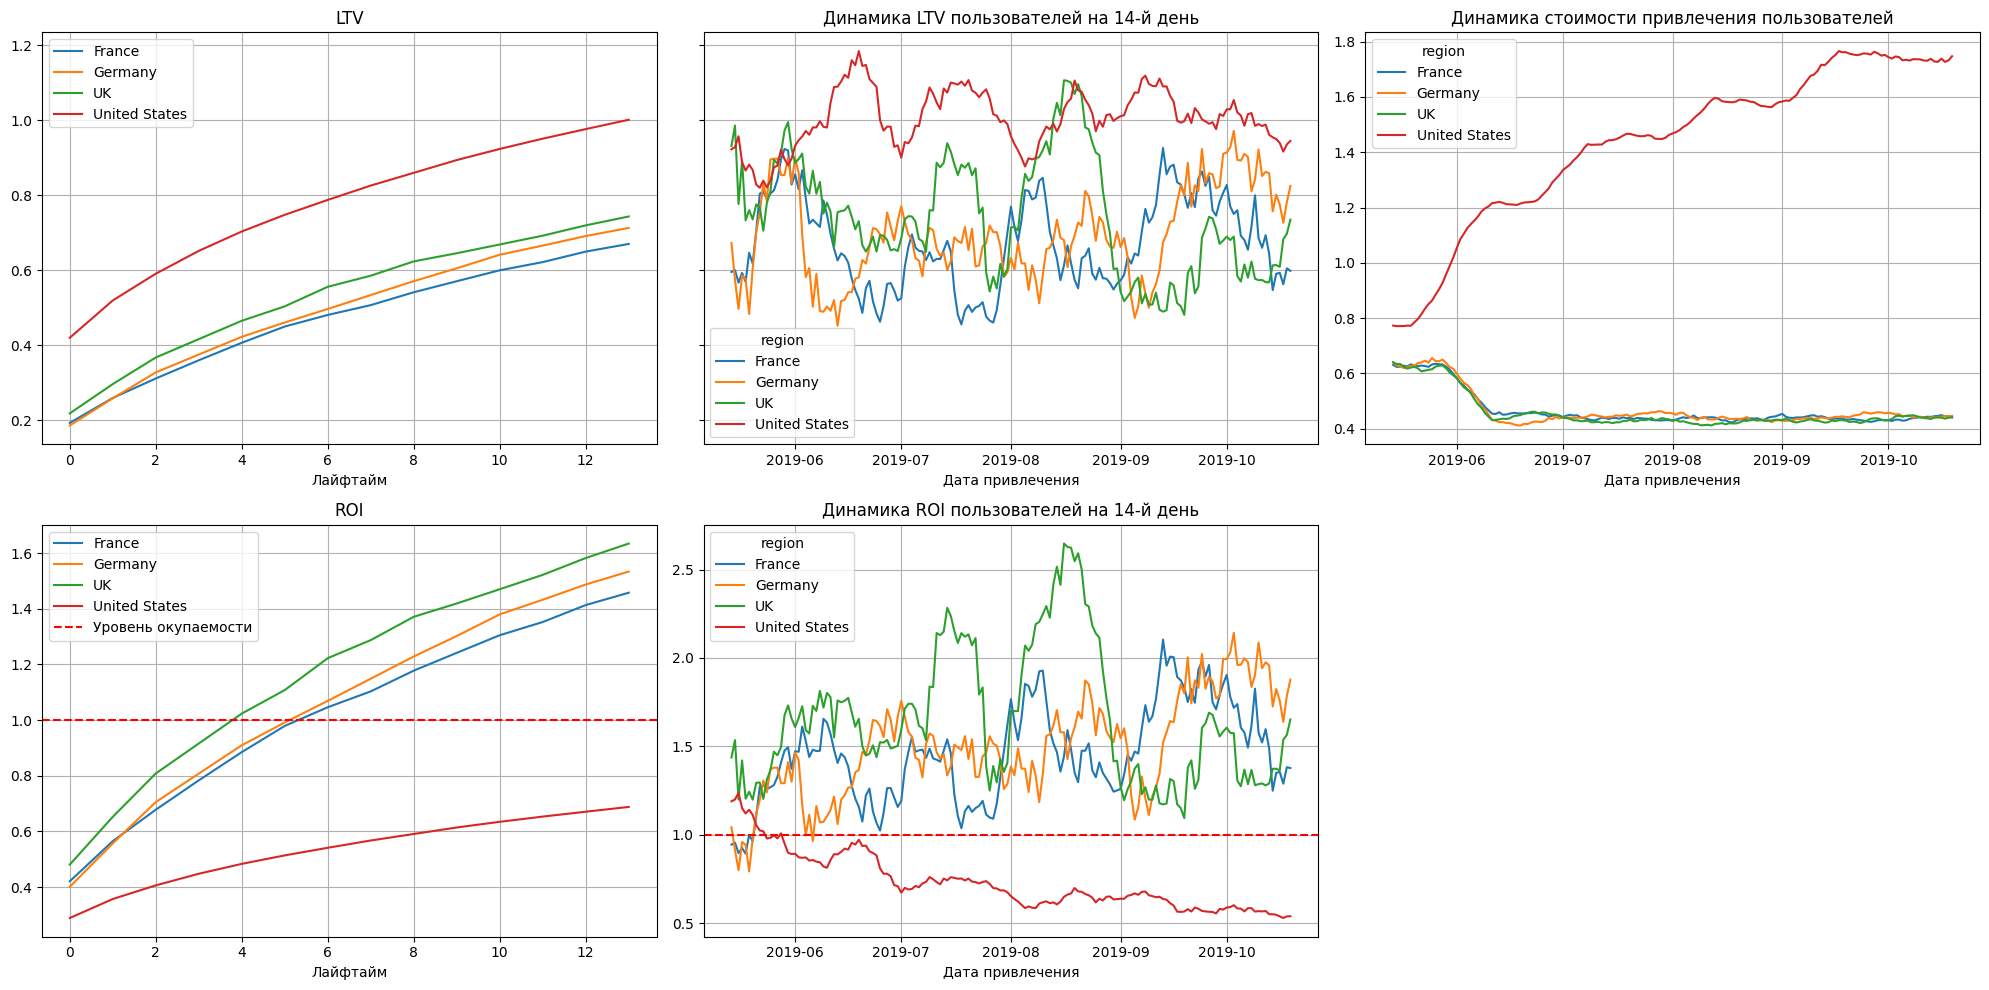

In [84]:
# Выбор параметра (страна)
dimensions = ['region']

# Применяем функцию для расчета метрик
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = (get_ltv(profiles,
                                                                       orders,
                                                                       observation_date,
                                                                       horizon_days,
                                                                       dimensions=dimensions)
                                                              )
# Визуализируем информацию
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Выводы из визуальной информации:

- LTV больше всего в США, логично, т.к. там больше всего клентов;
- стоимость привлечения клиентов в США постоянно растет, в отличие от других стран;
- клиенты из США так и не окупились за рассматриваемый период, в отличие от других стран;
- динамика ROI показывает отрицательную динамику у пользователей США за весь период;
- резюмируя можно сказать, что лучше всего окупаются клиенты из Великобритании и Германии. Клиенты из США самые дорогие и затраты на них не окупаются.

Посчитаем и визуализируем конверсию, вызвав заранее заготовленные функции get_conversion() и plot_conversion().

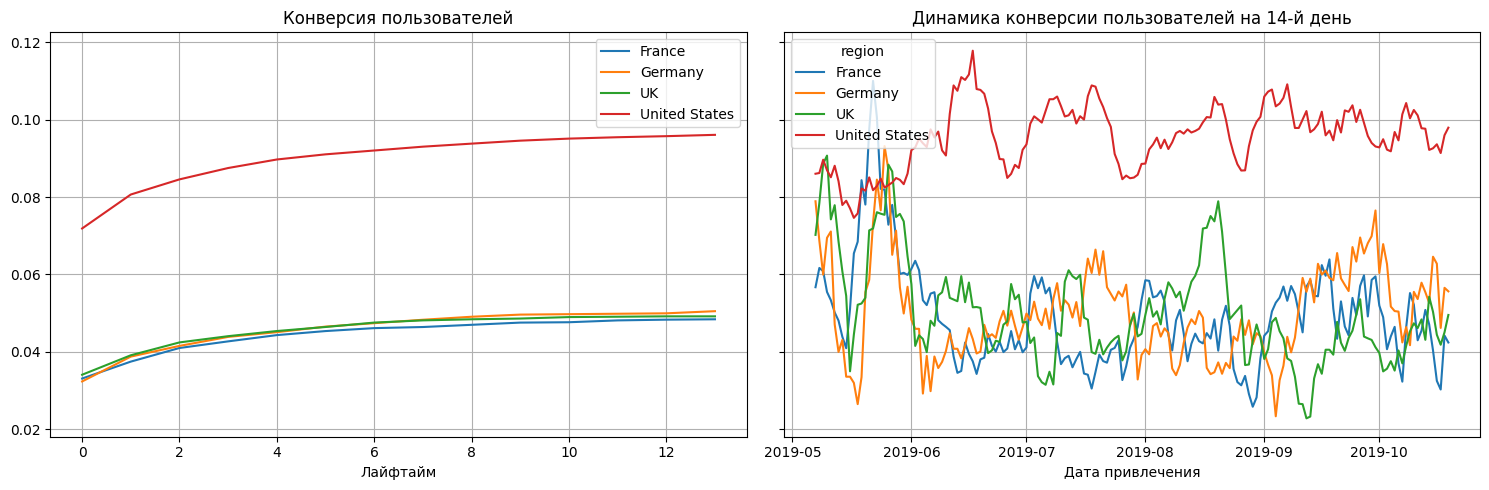

In [85]:
# Применяем функцию для расчета метрик
conversion_raw, conversion_grouped, conversion_history = (get_conversion(profiles,
                                                                         orders,
                                                                         observation_date,
                                                                         horizon_days,
                                                                         dimensions=dimensions)
                                                         )
# Визуализируем информацию
plot_conversion(conversion_grouped, conversion_history, horizon_days)

По конверсии в разрезе стран очевидно, что лучше всего конвертируются пользователи из США. Слабая конверсия в Великобритании, Германии и Франции, однако доля клиентов там не большая.

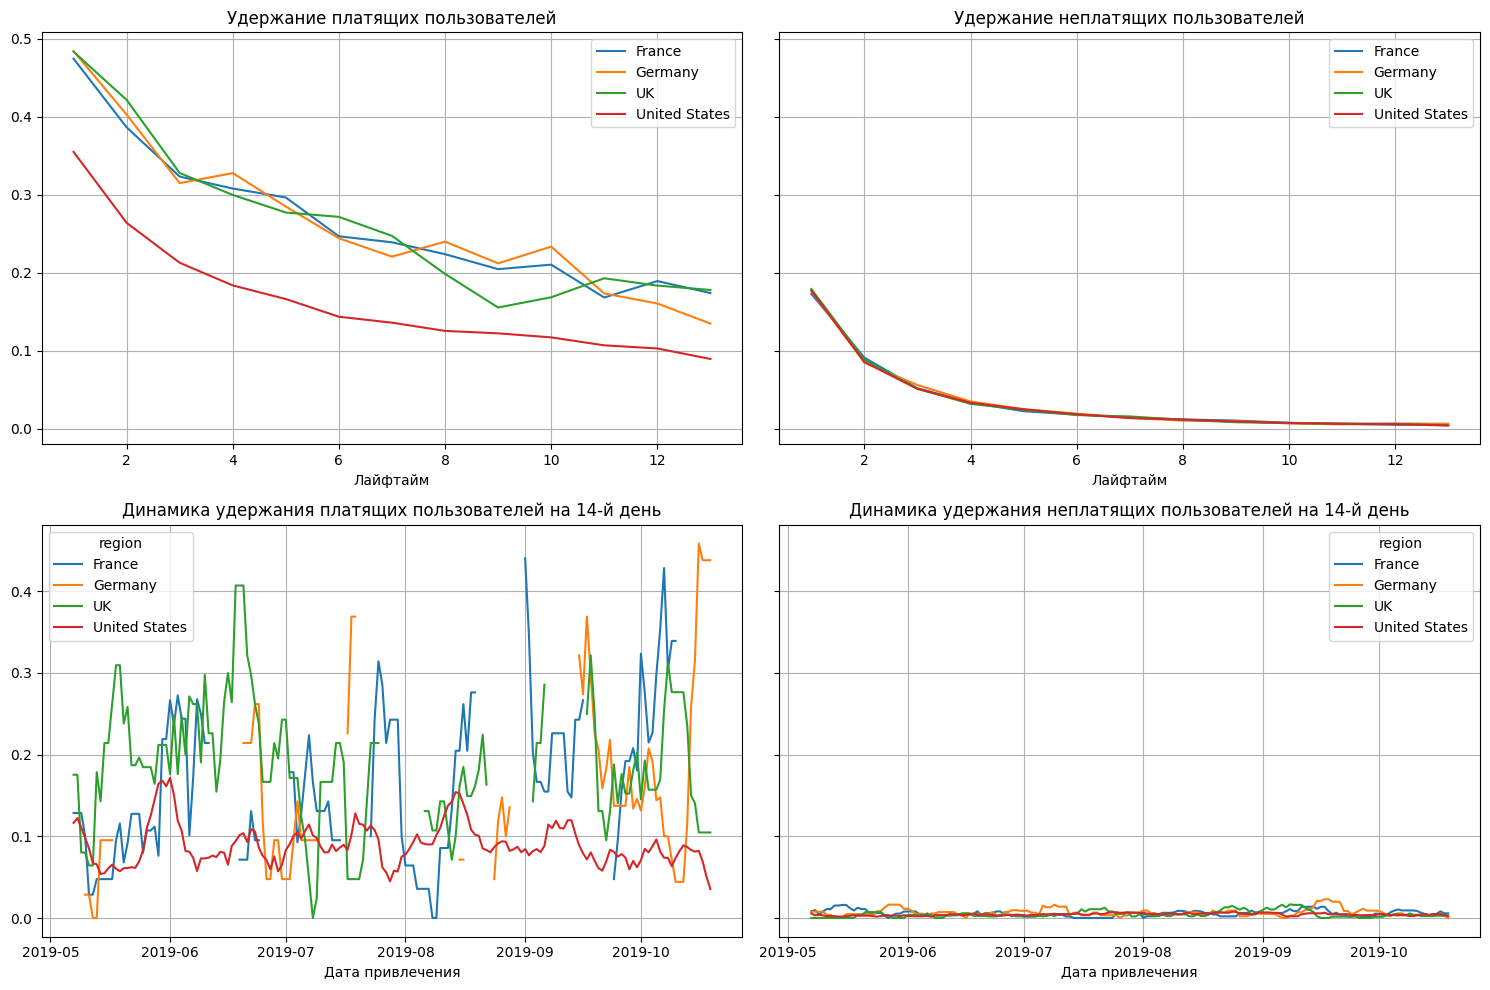

In [86]:
# Применяем функцию для расчета метрик
retention_raw, retention_grouped, retention_history = (get_retention(profiles,
                                                                     visits,
                                                                     observation_date,
                                                                     horizon_days,
                                                                     dimensions=dimensions)
                                                      )
# Визуализируем информацию
plot_retention(retention_grouped, retention_history, horizon_days)

По удержанию видно, что страдают пользователи из США. Неплатящие пользователи традиционно слабо удерживаются.

##### Рекламные каналы

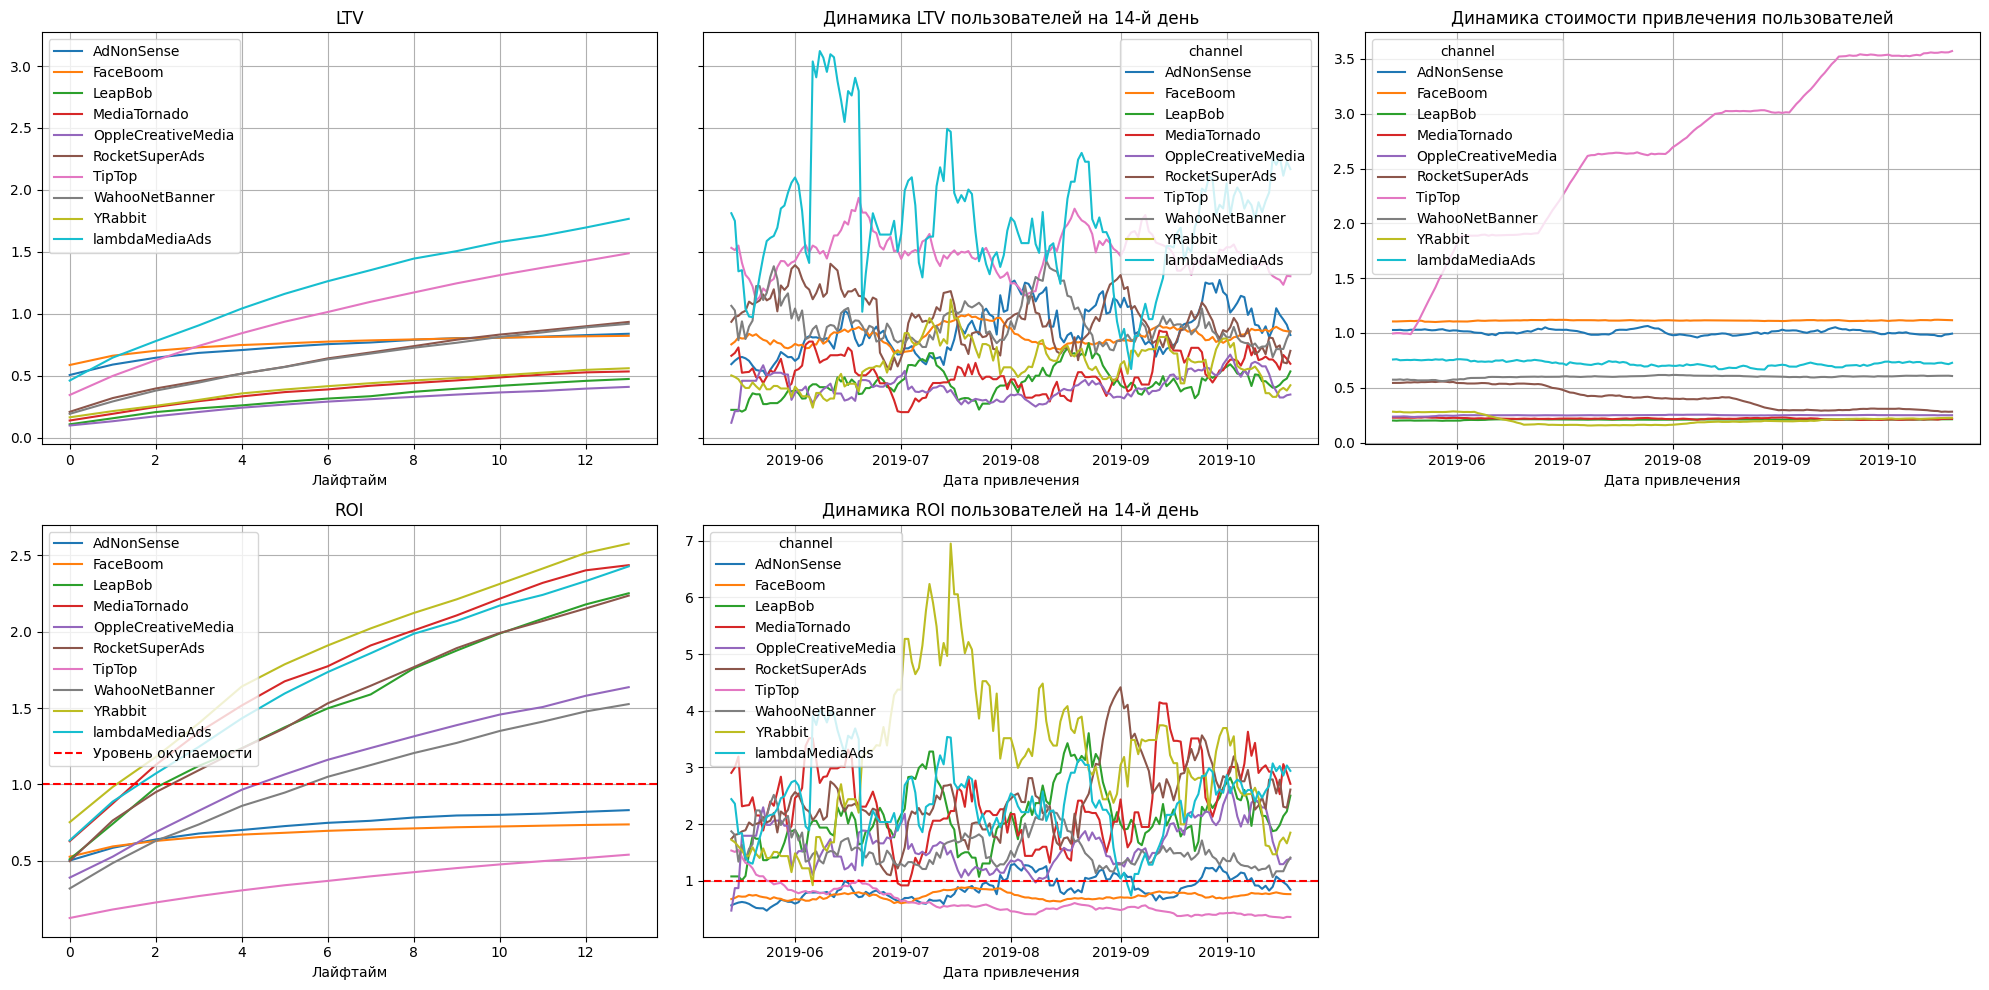

In [87]:
# Выбор параметра (канал привлечения рекламы)
dimensions = ['channel']

# Применяем функцию для расчета метрик
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = (get_ltv(profiles,
                                                                       orders,
                                                                       observation_date,
                                                                       horizon_days,
                                                                       dimensions=dimensions)
                                                              )
# Визуализируем информацию
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Из визуальной информации можно сделать ряд выводов:

- по LTV в топе TipTop и LambdaMediaAds;
- виден сильный рост стоимости привлечения пользователей в TipTop;
- не окупается реклама в TipTop, FaceBoom и AdNonSence;
- хорошо показал себя канал YRabbit, в июле явный пик по ROI на 14й день.

Посчитаем и визуализируем конверсию, вызвав заранее заготовленные функции get_conversion() и plot_conversion().

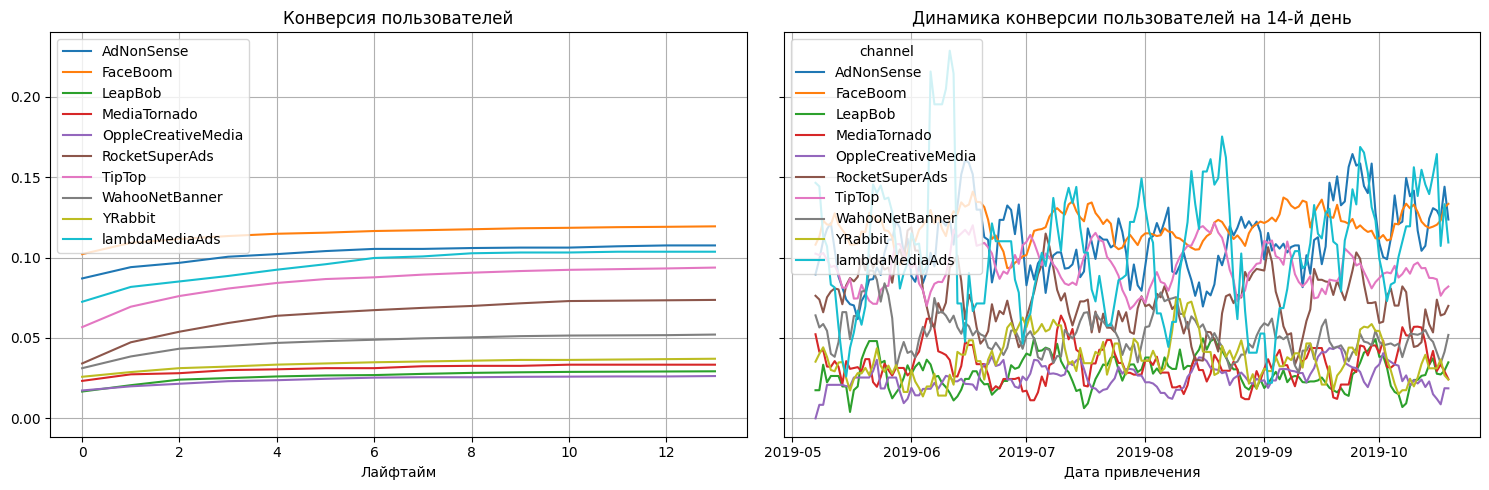

In [88]:
# Применяем функцию для расчета метрик
conversion_raw, conversion_grouped, conversion_history = (get_conversion(profiles,
                                                                         orders,
                                                                         observation_date,
                                                                         horizon_days,
                                                                         dimensions=dimensions)
                                                         )
# Визуализируем информацию
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Лучше всего конвертируются пользователи с FaceBoom.

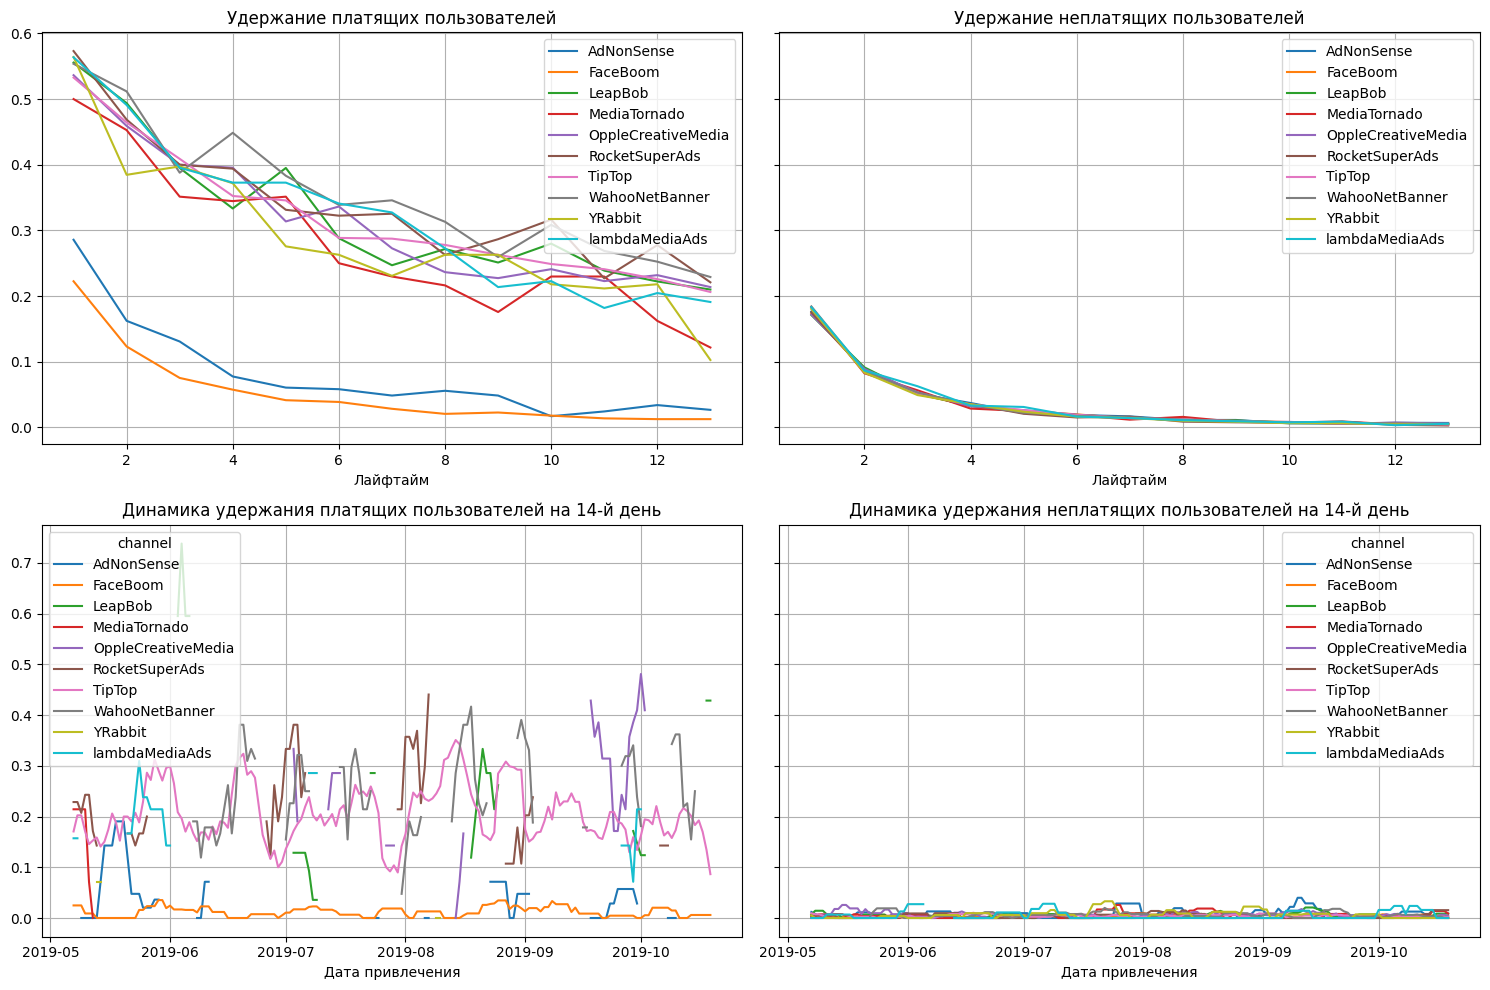

In [89]:
# Применяем функцию для расчета метрик
retention_raw, retention_grouped, retention_history = (get_retention(profiles,
                                                                     visits,
                                                                     observation_date,
                                                                     horizon_days,
                                                                     dimensions=dimensions)
                                                      )
# Визуализируем информацию
plot_retention(retention_grouped, retention_history, horizon_days)

Все плохо с удержанием в FaceBoom и AdNonSence.

Вывод по разделу

- в целом затраты на рекламу не окупаются ко 2й неделе жизненного цикла пользователей;
- очевидно влияние большой стоимости затрат на два основных источника рекламы: TipTop и FaceBoom;
- стоит обратить внимание на владельцев Mac и Iphone, т.к. их больше всего, а затраты на их привлечение растут из месяца в месяц из-за чего страдает ROI;
- лучше всего окупаются клиенты из Великобритании и Германии. Клиенты из США самые дорогие и затраты на них не окупаются.

### Основные выводы:

- была проанализирована информация о 93 569 пользователях, привлеченных из США, Великобритании, Германии и Фаранции;
- реклама закупалась на 10 различных источниках, общие затраты на рекламу составили 105,497.30 дол. США;
- устройства с которых пользуюся приложением Procrastinate Pro+: 'Mac', 'iPhone', 'PC' и 'Android';
- самый дорогой трафик - TipTop (средняя стоимость - 2.80 дол. США за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 дол. США и 1.01 дол. США соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 дол. США до 0.72 дол. США;
- cредняя стоимость привлечения платного клиента из всех источников 1.17 дол. США;
- в целом затраты на рекламу не окупаются по ряду причин:
    - сильный рост стоимости рекламы по двум основным источникам: TipTop и FaceBoom, при том, что основной источник рекламы TipTop не приносит основного дохода;
    - основные клиенты это пользовали США, являющиеся владельцами Mac и iPhone, однако их LTV не превышает CAC, что говорит об их убыточности.
    
Рекомендации:
- диверсификация по странам: основные пользователи из США, однако они не приносят прибыли, клиенты из Великобритании, Франции и Германии являются прибыльными, однако их меньшинство. Логично было бы не только сделать упор на Великобританию, Францию и Германию, но и расширить географию приложения на другие страны и континенты;
- очевидна проблема с окупаемостью "яблочников", а учитывая, что их подавляющее большинство необходимо провести тщательную диагностику корректности работы приложения на данных устройствах и запросить обратную связь от пользователей данных устройств. Также если говорить об устройствах хорошо себя показали пользователи РС, они окупаются и хорошо удерживаются, было бы логично сделать упор на этот сегмент;
- диверсификация по рекламным источникам: из анализа очевидно, что реклама в TipTop и FaceBoom не окупается. Возможно следует рассмотреть альтернативные источники и перераспределить бюджет по остальным рекламным площадкам.